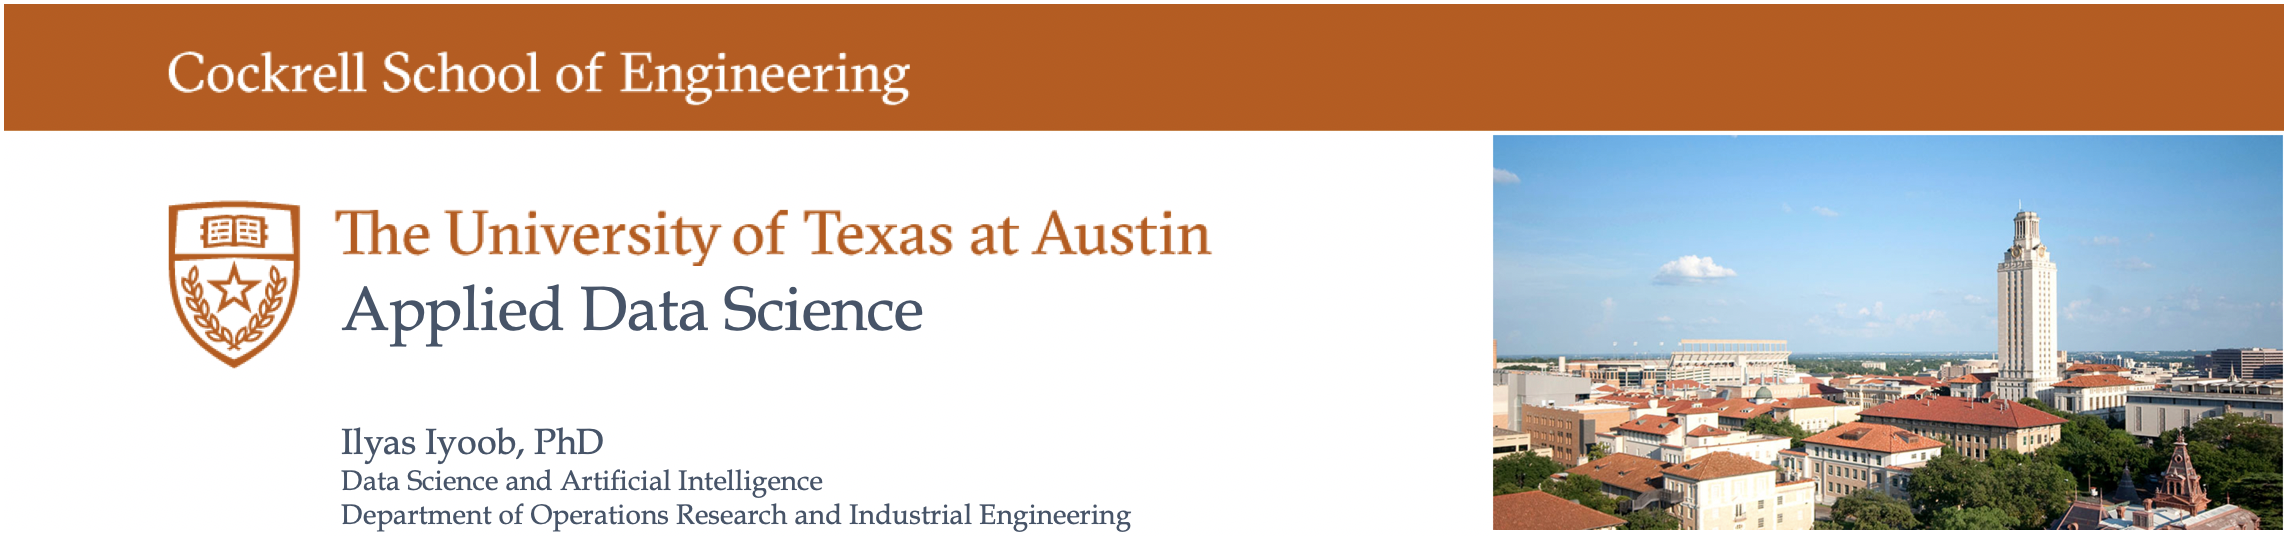

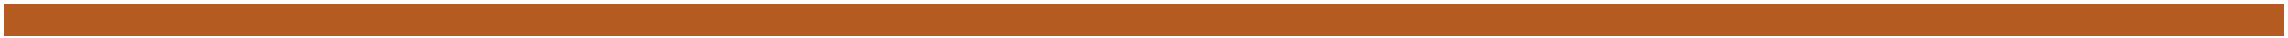

## <font color='#475468'> Heart Disease:</font>
### <font color='#475468'> Can you predict heart disease in patients?</font>

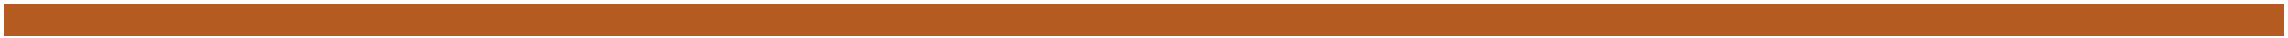

# Initialize

In [5]:
import pandas as pd


# Load Data

In [6]:
dfHrt=pd.read_csv('/files/heart_disease.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/files/heart_disease.csv'

In [ ]:
dfHrt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Analysis

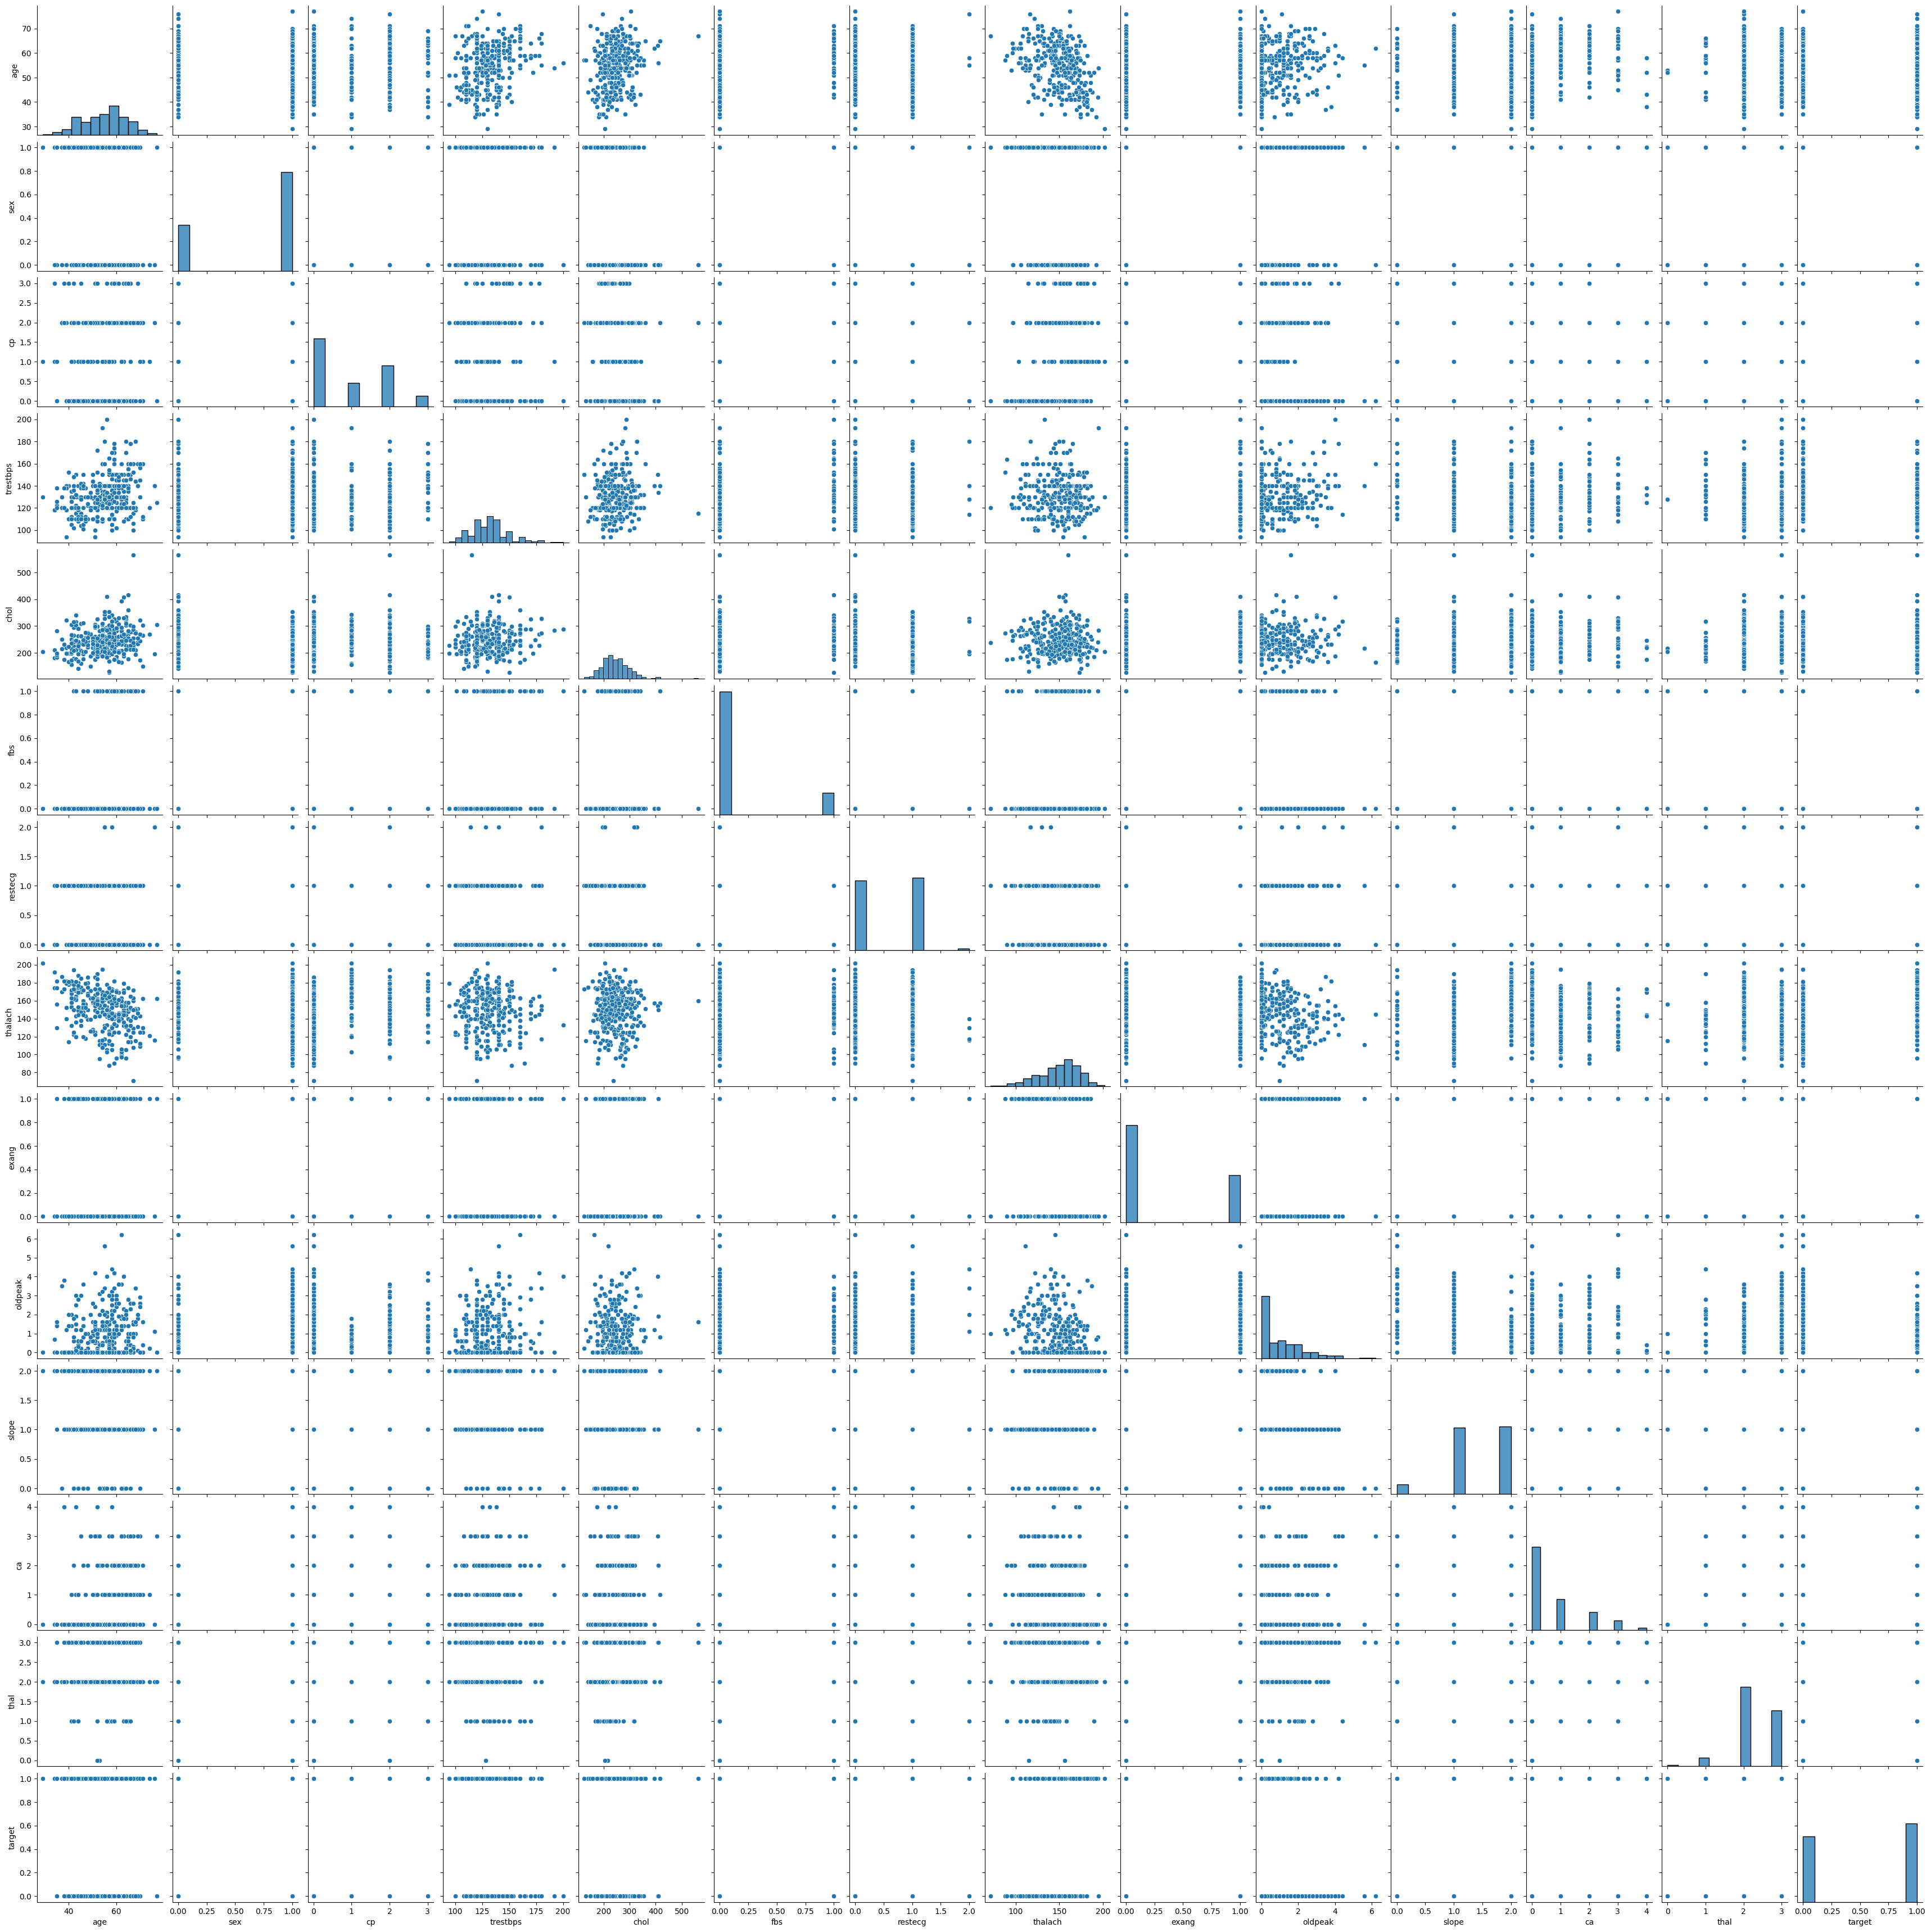

In [ ]:
import seaborn as sns

sns.pairplot(dfHrt)

<Axes: xlabel='age', ylabel='chol'>

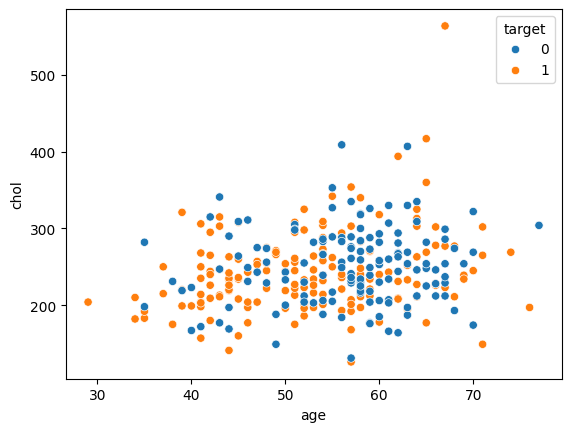

In [ ]:
import seaborn as sns

sns.scatterplot(x=dfHrt['age'], y=dfHrt['chol'], hue=dfHrt['target'])


# Build Model

In [ ]:
from sklearn.preprocessing import scale

y = dfHrt['target']
X = scale(dfHrt.drop('target', axis=1),axis=0)

In [ ]:
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Logistic Regression

When you think data is dependent (start here).

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression

# Define
mdlHrtLgr = LogisticRegression(random_state=0)

# Fit
mdlHrtLgr.fit(X_train, y_train)

# Predict
y_test_pred = mdlHrtLgr.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_test_pred)
mae

0.16393442622950818

In [ ]:
# Evaluate using Confusion Matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[23,  6],
       [ 4, 28]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.82      0.88      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_test_pred)

0.8340517241379312

## Build Naive Bayes Model

Use this model when features are independent of each other.

In [ ]:
# Gaussian

from sklearn.naive_bayes import GaussianNB

# Define
mdlHrtNbg = GaussianNB()

# Fit
mdlHrtNbg.fit(X_train, y_train)

# Predict
y_test_pred = mdlHrtNbg.predict(X_test)

# Evaluate

rocaucscore = roc_auc_score(y_test, y_test_pred)

print("Naive Bayes:")
print("ROC AUC Score:", rocaucscore)

Naive Bayes:
ROC AUC Score: 0.8545258620689655


## Build K-NN Model

K-NN is used when data is balanced, so it can join an appropriate cluster.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define
mdlHrtKnn = KNeighborsClassifier(n_neighbors=10)

# Fit
mdlHrtKnn.fit(X_train, y_train)

# Predict
y_test_pred = mdlHrtKnn.predict(X_test)

# Evaluate

rocaucscore = roc_auc_score(y_test, y_test_pred)

print("K-NN:")
print("ROC AUC Score:", rocaucscore)

K-NN:
ROC AUC Score: 0.8340517241379312


### Build SVM

Good with outliers

In [ ]:
from sklearn.svm import SVC

# define
mdlSVM = SVC()
